# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 67.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 50.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 80.1 MB/s eta 0:00:01
     |██████████████████

In [2]:
#pip install ipywidgets

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.ToTensor()
# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
len(training_data)

60000

In [10]:
# Create the training and test dataloaders with a batch size of 64 (it'll be loaded 60000/64 times)
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1. Tansform = transforms.ToTensor() - which basically transforms the data to Tensor which is supported format for building a Neural Network architecture in PyTorch
2. Not used any other normalisation as accuracy looks good with out normalisation too

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [11]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [12]:
len(train_loader)

938

In [9]:
len(test_loader)

157

6


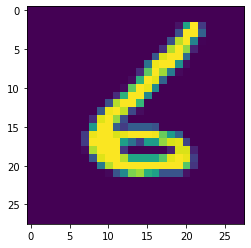

8


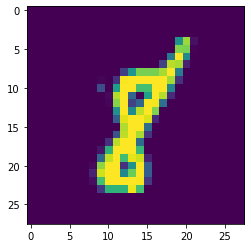

7


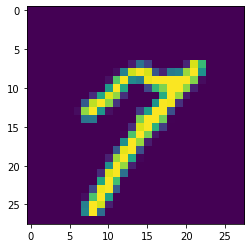

5


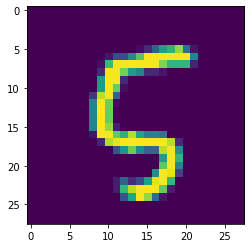

6


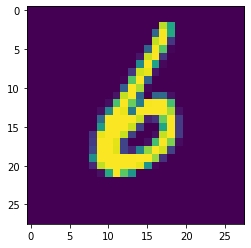

In [13]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [14]:
# Define the class for your neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = NeuralNetwork()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [16]:
# Choose Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    train_total_obs = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        train_total_obs += len(labels)
    print(f'Epoch {epoch + 1} % training loss: {train_loss/train_total_obs:.5f}')
    train_loss_history.append(train_loss/train_total_obs)


    val_loss = 0.0
    val_correct = 0
    val_total_obs = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
        val_total_obs += len(labels)
    print(f'Epoch {epoch + 1} % validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 % training loss: 0.00525
Epoch 1 % validation loss: 0.16423
Epoch 4 % validation loss: 0.08168
Epoch 5 % training loss: 0.00088
Epoch 5 % validation loss: 0.07586
Epoch 6 % training loss: 0.00070
Epoch 6 % validation loss: 0.07496
Epoch 7 % training loss: 0.00058
Epoch 7 % validation loss: 0.07230
Epoch 8 % training loss: 0.00048
Epoch 8 % validation loss: 0.07536
Epoch 9 % training loss: 0.00039
Epoch 9 % validation loss: 0.07610
Epoch 10 % training loss: 0.00033
Epoch 10 % validation loss: 0.08095


Plot the training loss (and validation loss/accuracy, if recorded).

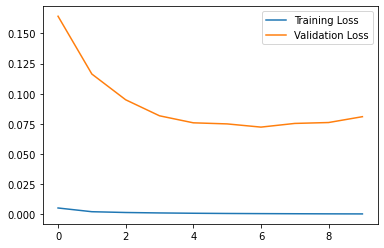

In [19]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
test_correct = 0
net.eval()
total_obs = 0
#total = 0
for inputs, labels in test_loader:
        # move the data and target to the device
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        test_correct += (predicted == labels).sum().item()
        total_obs += len(labels)
        
print(test_correct)
print(total_obs)
accuracy = 100 * test_correct / len(test_data)
print('Accuracy: {:.2f}%'.format(accuracy))

9761
10000
Accuracy: 97.61%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [22]:
### Accuracy looks good already but just experminenting with weight_decay in Adam optimiser ###

In [21]:
# Define the class for your neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
opt_net = NeuralNetwork()

# Choose an optimizer
optimizer = optim.Adam(opt_net.parameters(), lr=0.001,weight_decay =5)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    train_total_obs = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = opt_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        train_total_obs += len(labels)
    print(f'Epoch {epoch + 1} % training loss: {train_loss/train_total_obs:.5f}')
    train_loss_history.append(train_loss/train_total_obs)


    val_loss = 0.0
    val_correct = 0
    val_total_obs = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = opt_net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
        val_total_obs += len(labels)
    print(f'Epoch {epoch + 1} % validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 % training loss: 0.03600
Epoch 1 % validation loss: 2.30248
Epoch 2 % training loss: 0.03600
Epoch 2 % validation loss: 2.30254
Epoch 3 % training loss: 0.03600
Epoch 3 % validation loss: 2.30253
Epoch 4 % training loss: 0.03600
Epoch 4 % validation loss: 2.30249
Epoch 5 % training loss: 0.03600
Epoch 5 % validation loss: 2.30256
Epoch 6 % training loss: 0.03600
Epoch 6 % validation loss: 2.30254
Epoch 7 % training loss: 0.03600
Epoch 7 % validation loss: 2.30255
Epoch 8 % training loss: 0.03600
Epoch 8 % validation loss: 2.30258
Epoch 9 % training loss: 0.03600
Epoch 9 % validation loss: 2.30245
Epoch 10 % training loss: 0.03600
Epoch 10 % validation loss: 2.30258


In [26]:
test_correct = 0
opt_net.eval()
total_obs = 0
#total = 0
for inputs, labels in test_loader:
        # move the data and target to the device
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = opt_net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        test_correct += (predicted == labels).sum().item()
        total_obs += len(labels)
        
print(test_correct)
print(total_obs)
accuracy = 100 * test_correct / len(test_data)
print('Accuracy: {:.2f}%'.format(accuracy))

974
10000
Accuracy: 9.74%


## Saving your model
Using `torch.save`, save your model for future loading.

In [37]:
ls

data/                                   model/            Untitled.ipynb
MNIST_Handwritten_Digits-STARTER.ipynb  requirements.txt


In [46]:
# Save the model
PATH = "model/MNIST"
torch.save(opt_net.state_dict(),'mnist.pth')